In [1]:
from implementation import glm, knockoff_class, params
from implementation.load import load_pickle, load_fmri
from implementation.utils import KNOCK_DIR

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5)

Loading the full data set and concatenating 10 subjects.

In [2]:
task = 'MOTOR'
subject = 1
# load data
x_all = load_fmri(task=task)
# mangle data (by Alec)
x_all = np.swapaxes(x_all[:10, :, :], 1, 2)
x_all_r = x_all.reshape(-1, x_all.shape[-1]).T
x_all_r.shape

Loaded Data - Shape: (100, 379, 284)


(379, 2840)

 Doing the regular Gaussian Knockoffs on one subject.

Loaded Data - Shape: (100, 379, 284)
Divided 379 variables into 154 groups.
Divided 379 variables into 154 groups.
Size of largest groups: 37
Mean groups size: 2.461038961038961
Eigenvalue for Sigma Hat, Min: -2.254258744564657e-15
Eigenvalue for Sigma Hat Representatives, Min: 0.0436073458894031
Original for Correlations, Max: 0.8022580778679829
Representatives for Correlations, Max: 0.4585931438028127
Average absolute pairwise correlation: 0.859.
Shape of generated knockoff: (284, 154)


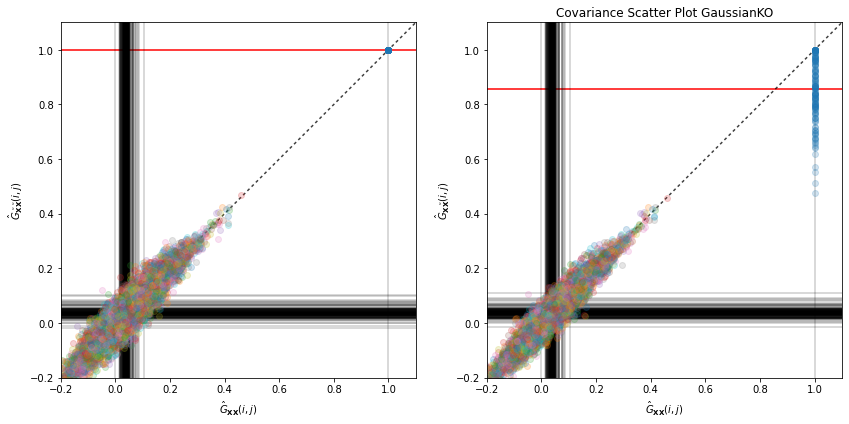

Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)
Shape of generated knockoff: (284, 154)


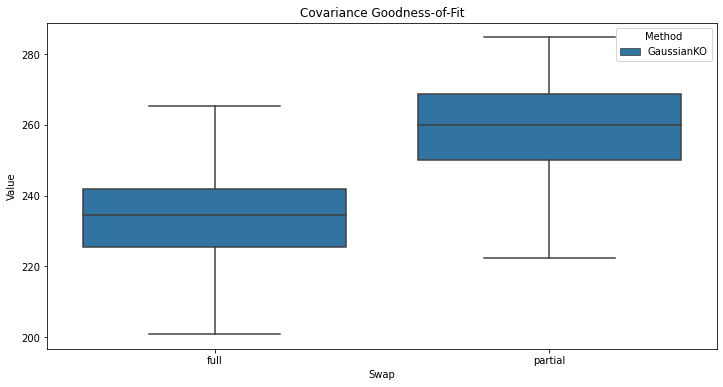

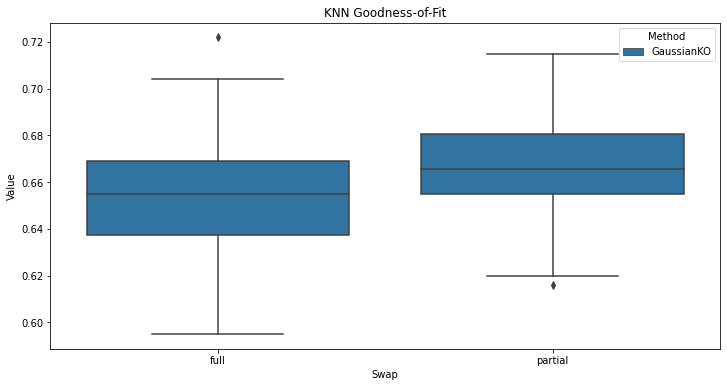

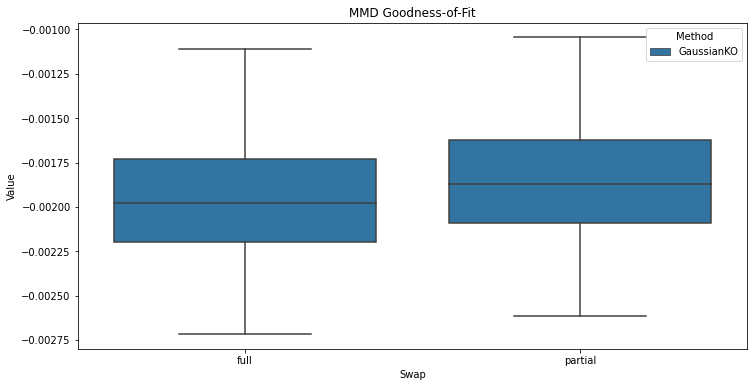

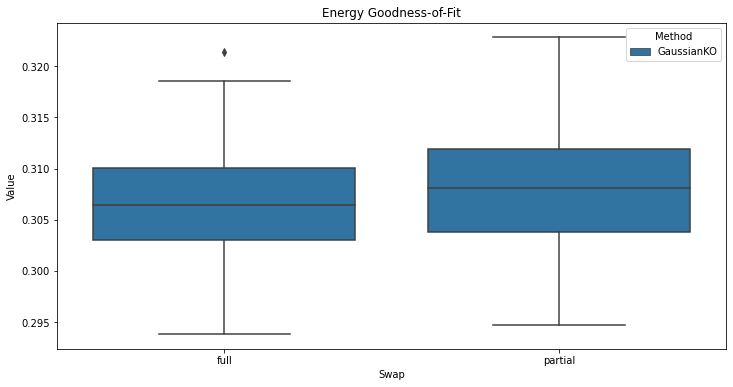

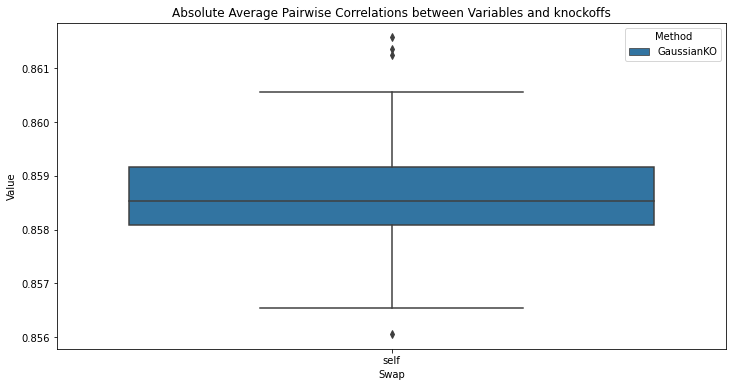

In [3]:
gaussian_single = knockoff_class.GaussianKnockOff(task, subject)
gaussian_single.name = "GaussianKO - single subject"

gaussian_single.load_fmri()

# Pre-processing the data: clustering to avoid correlations
gaussian_single.pre_process(max_corr=.3)

# Training the machine to build second-order knockoffs
_ = gaussian_single.fit()

# Plotting diagnostics to show the performance of the knockoffs
res_gaus_single = gaussian_single.diagnostics()

 Doing the regular Gaussian Knockoffs on 10 subjects.

Divided 379 variables into 162 groups.
Divided 379 variables into 162 groups.
Size of largest groups: 44
Mean groups size: 2.3395061728395063
Eigenvalue for Sigma Hat, Min: 0.09776709047939616
Eigenvalue for Sigma Hat Representatives, Min: 0.3198812768764372
Original for Correlations, Max: 0.8398548174609984
Representatives for Correlations, Max: 0.43342596711451026
Average absolute pairwise correlation: 0.135.
Shape of generated knockoff: (2840, 162)


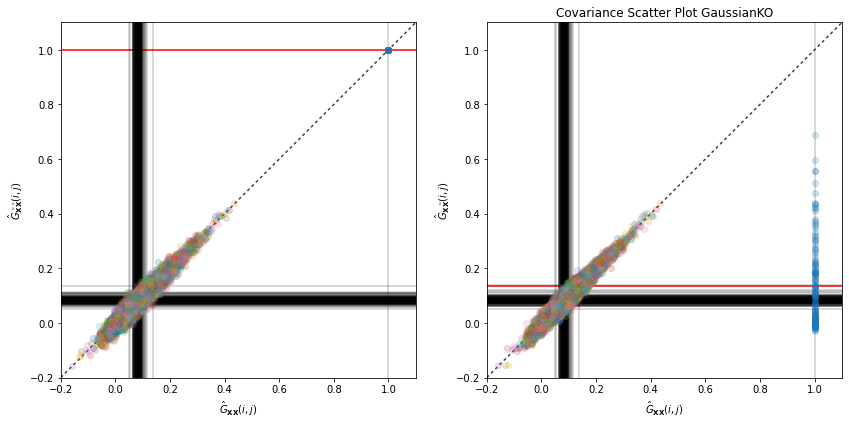

Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generated knockoff: (2840, 162)
Shape of generat

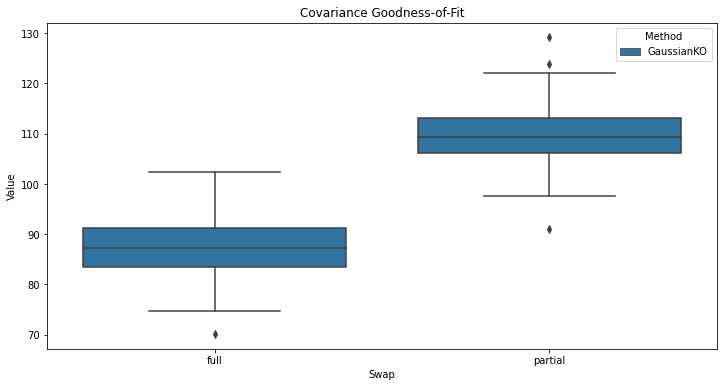

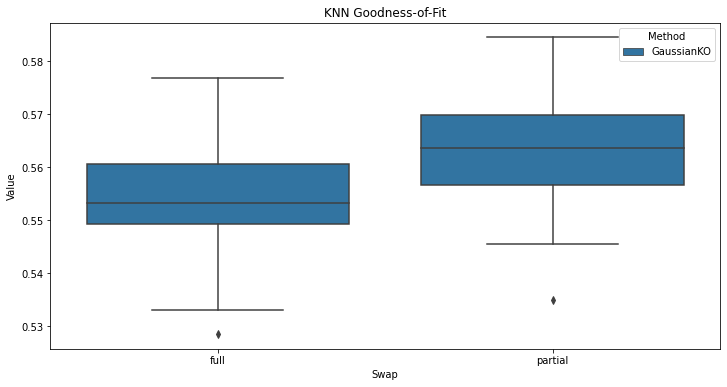

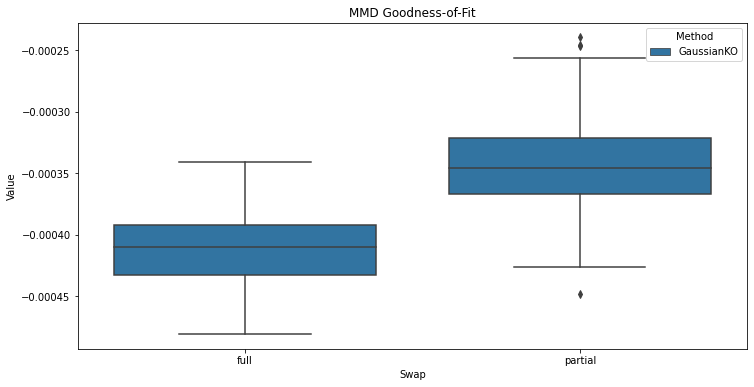

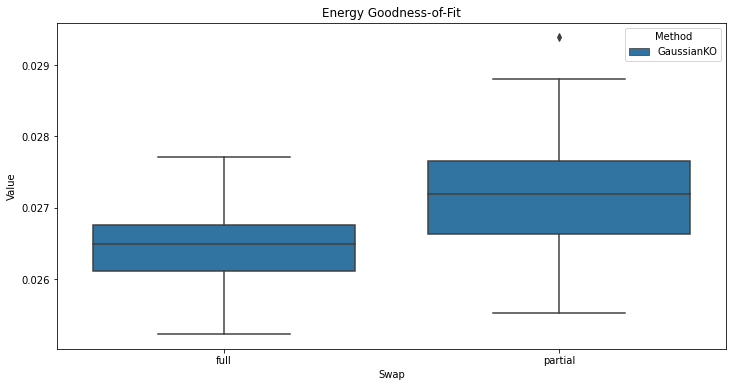

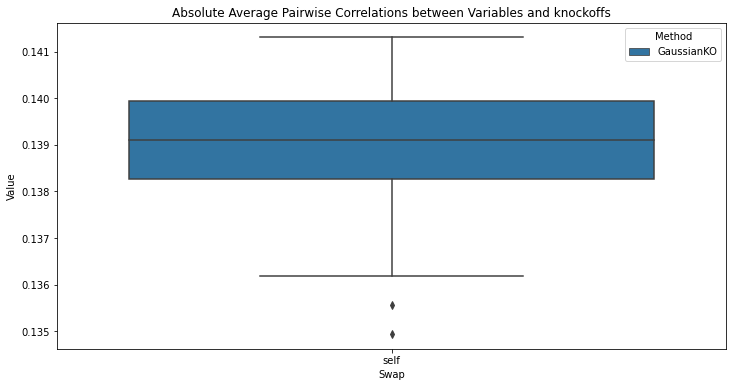

In [4]:
gaussian_mult = knockoff_class.GaussianKnockOff(task, subject)
gaussian_mult.name = "GaussianKO - 10 subjects"

gaussian_mult.load_existing(x_all_r)

# Pre-processing the data: clustering to avoid correlations
groups = gaussian_mult.pre_process(max_corr=.3)

# Training the machine to build second-order knockoffs
_ = gaussian_mult.fit()

# Plotting diagnostics to show the performance of the knockoffs
res_gaus_mult = gaussian_mult.diagnostics()

Doing the low rank second order Knockoffs for one subject.

Loaded Data - Shape: (100, 379, 284)
Shape of generated knockoff: (284, 379)


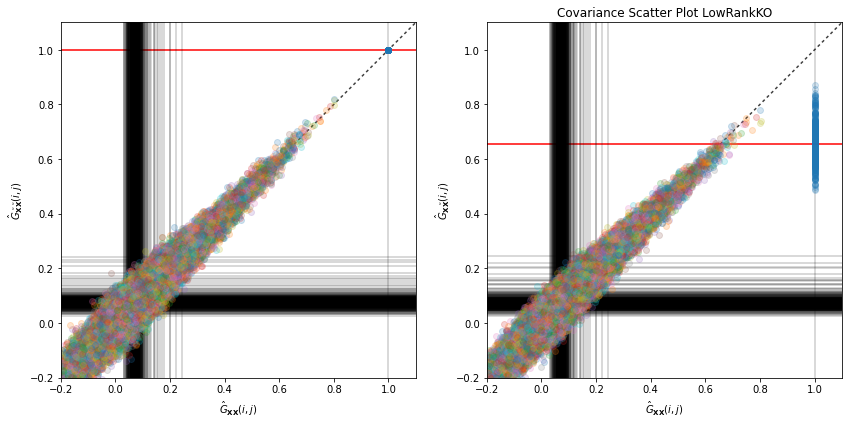

Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)
Shape of generated knockoff: (284, 379)


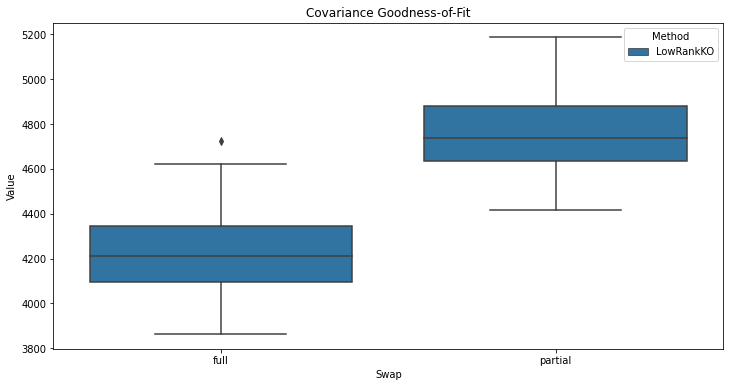

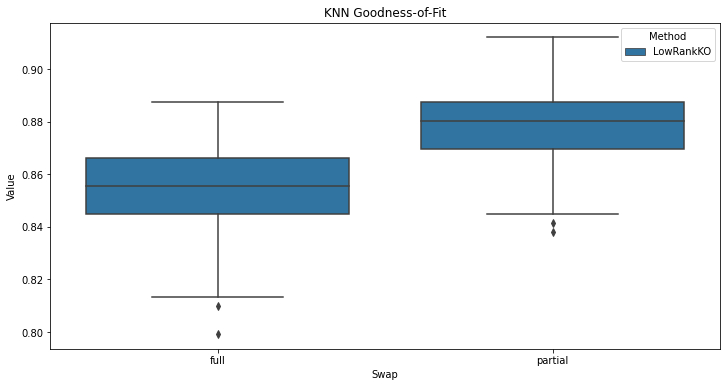

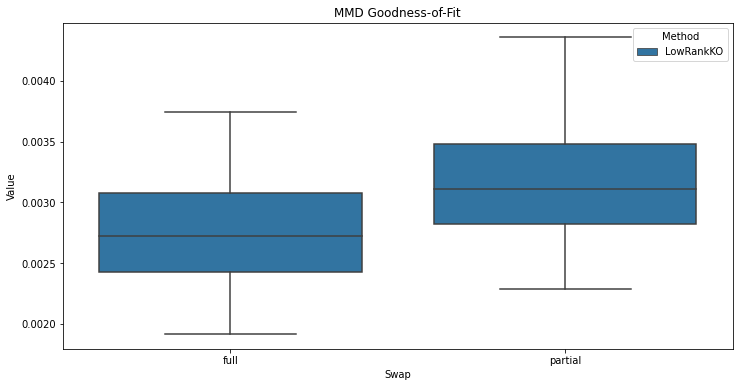

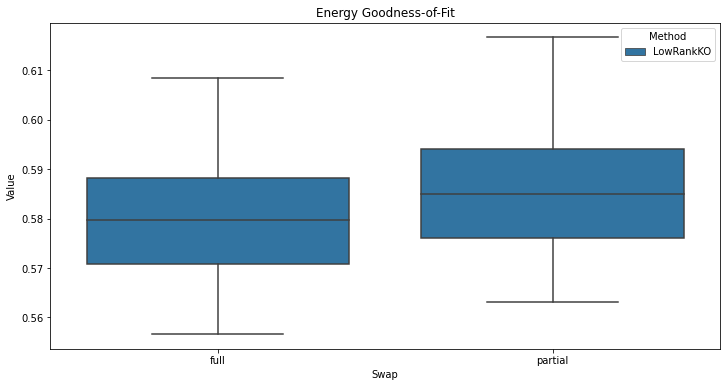

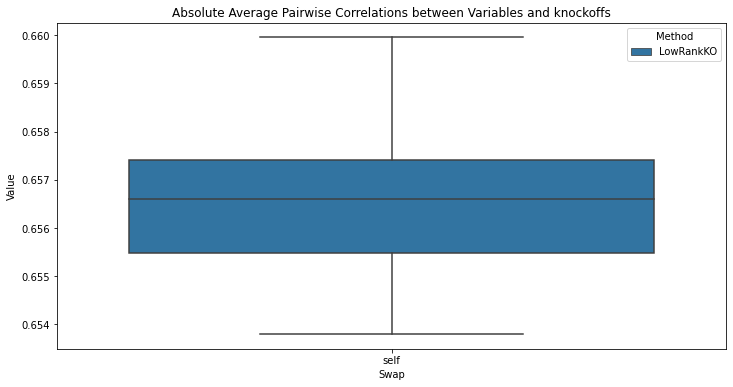

In [5]:
lowrank_single = knockoff_class.LowRankKnockOff(task, subject)  
lowrank_single.name = "LowRankKO - single subject"

lowrank_single.load_fmri()

# Training the machine to build low-ranked knockoffs
_ = lowrank_single.fit(rank=120) 

# Plotting diagnostics to show the performance of the knockoffs
res_lowrank_single = lowrank_single.diagnostics()

Doing the low rank second order Knockoffs for 10 subjects.

Shape of generated knockoff: (2840, 379)


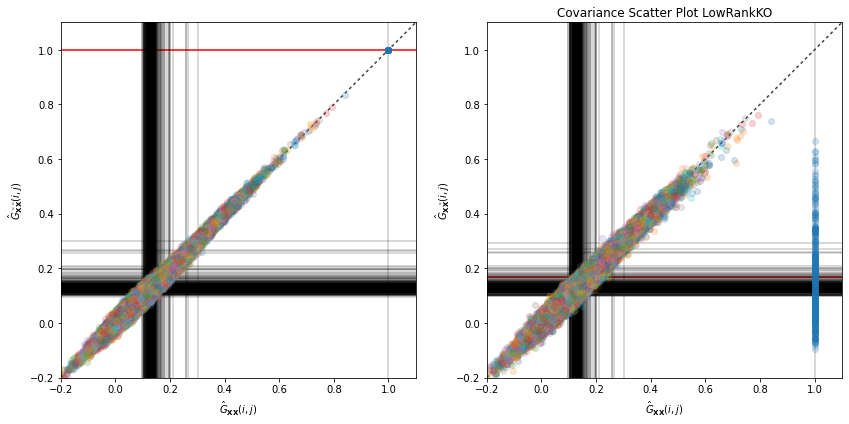

Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generated knockoff: (2840, 379)
Shape of generat

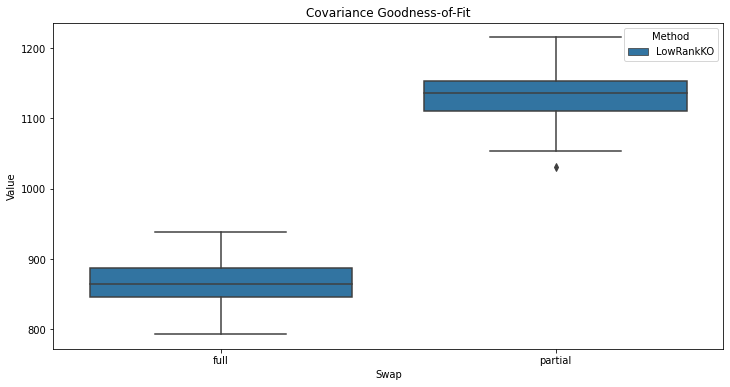

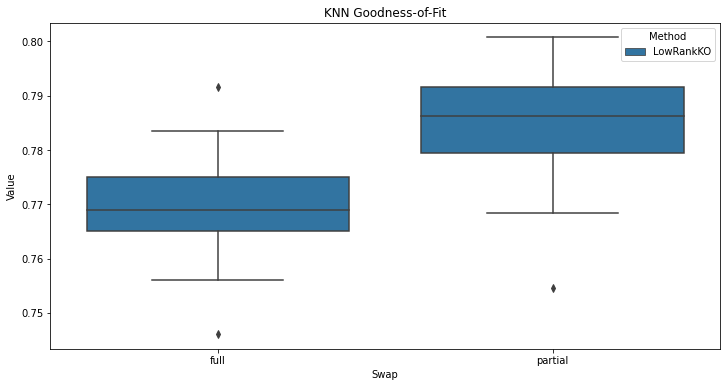

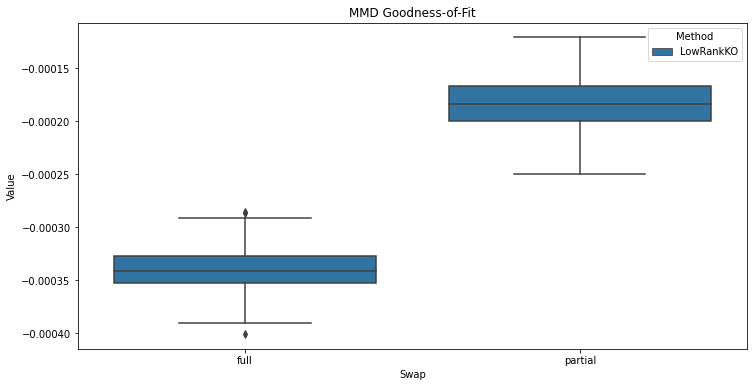

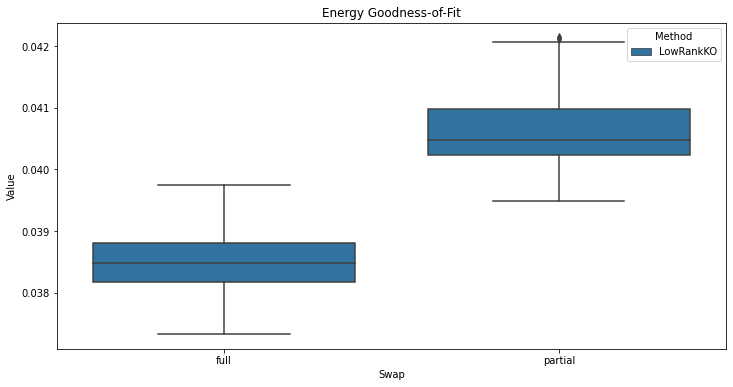

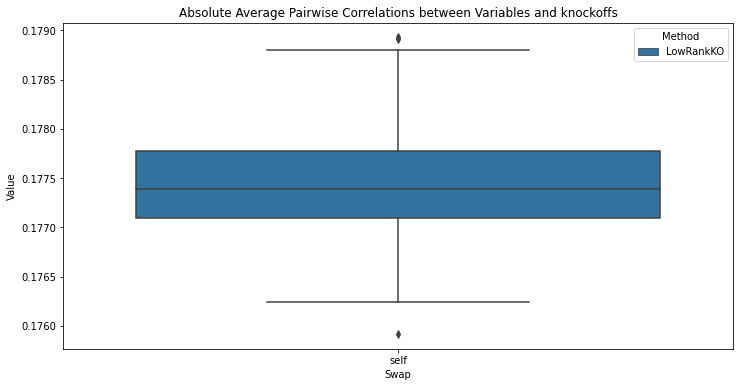

In [6]:
lowrank_mult = knockoff_class.LowRankKnockOff(task, subject)
lowrank_mult.name = "LowRankKO - 10 subjects"


lowrank_mult.load_existing(x_all_r)

# Training the machine to build low-ranked knockoffs
_ = lowrank_mult.fit(rank=120) 

# Plotting diagnostics to show the performance of the knockoffs
res_lowrank_mult = lowrank_mult.diagnostics()

Generating knockoffs for one subject with the Gaussian Knockoff generator for 10 subjects and computing diagnostics.

Shape of generated knockoff: (284, 162)


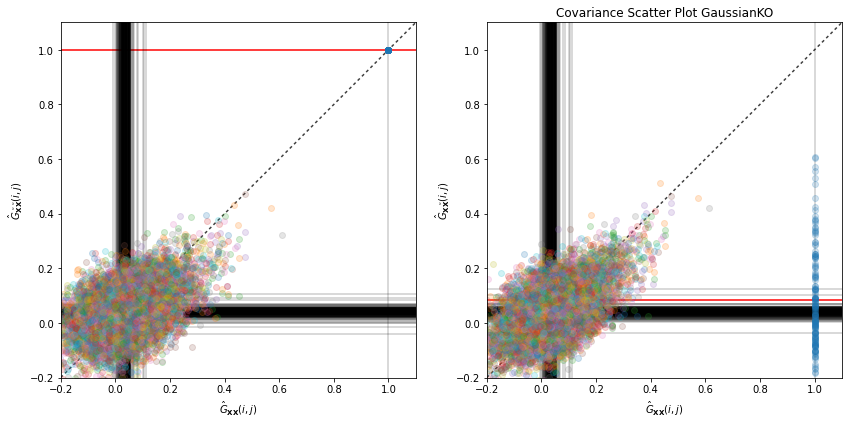

Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)
Shape of generated knockoff: (284, 162)


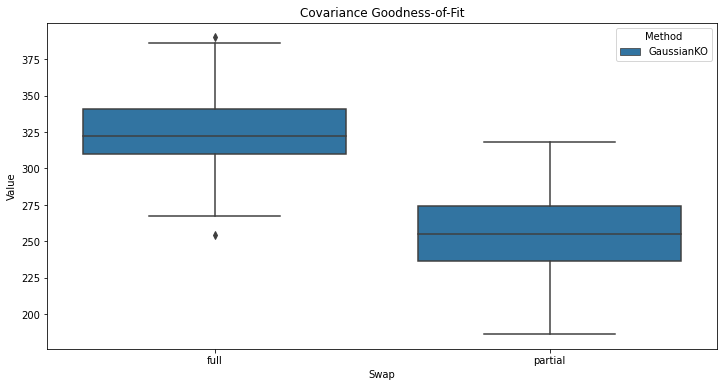

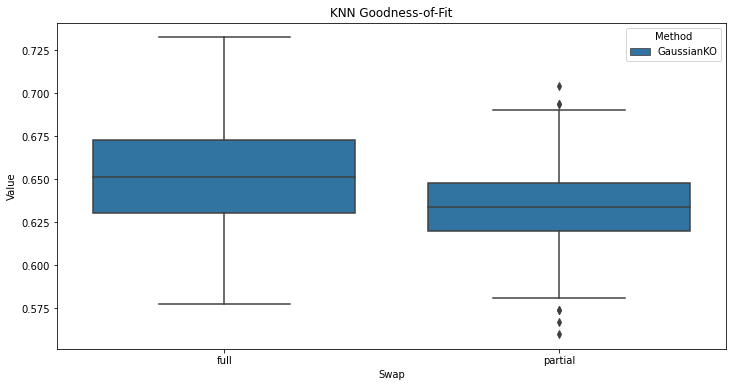

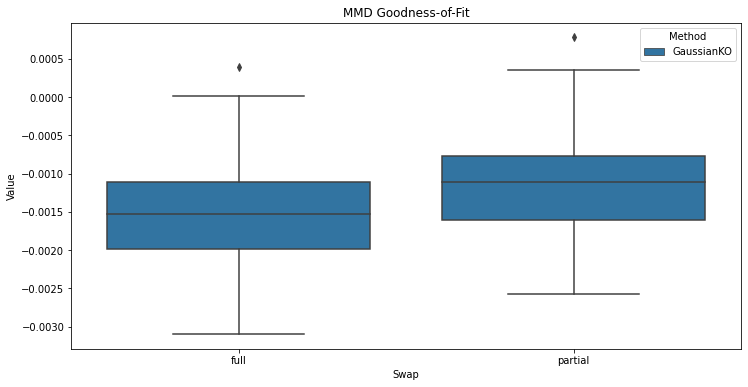

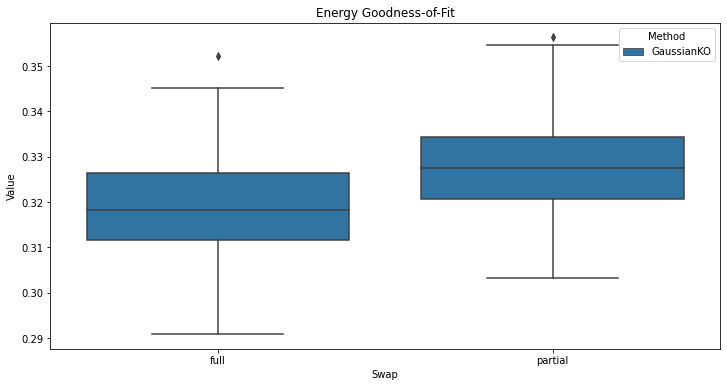

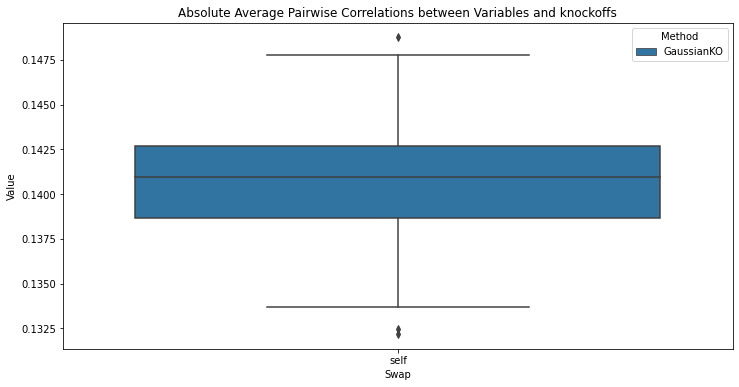

In [7]:
# getting the pre-processed subject training data
x_subject = gaussian_mult.x_train[:, 284:568]
# doing the diagnostics
res_gaussian_mult_on_single = gaussian_mult.diagnostics(x=x_subject)

In [8]:
res_gaus_single['Method'] = "GaussianKO - single subject"
res_gaus_mult['Method'] = "GaussianKO - 10 subjects"
res_lowrank_single['Method'] = "LowRankKO - single subject"
res_lowrank_mult['Method'] = "LowRankKO - 10 subjects"
res_gaussian_mult_on_single['Method'] = "GaussianKO - single multiple"

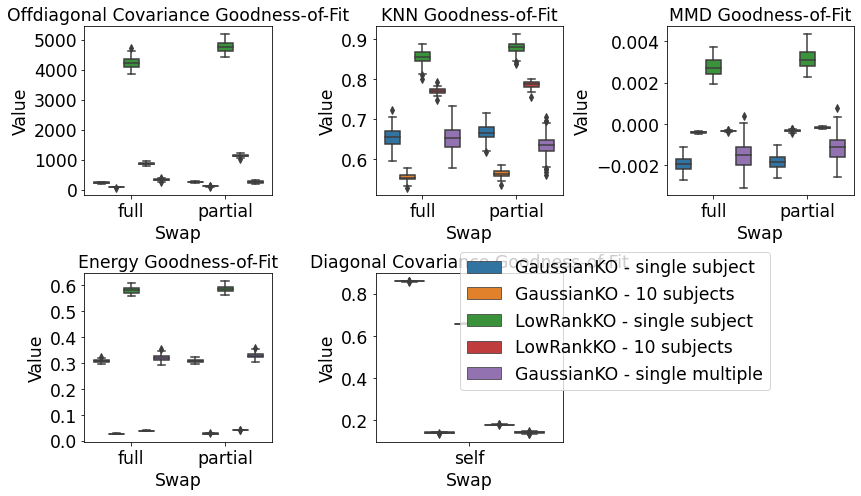

In [9]:
from implementation.utils import compare_diagnostics
import pandas as pd

res_total = pd.concat([res_gaus_single, res_gaus_mult, res_lowrank_single, res_lowrank_mult, res_gaussian_mult_on_single], ignore_index=True, sort=False)

compare_diagnostics(res_total)